In [1]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
# nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
#之後用到kaggle上要加的?
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

# Exploratory Data Analysis (EDA)

In [4]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
print('Trining dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('Test dataset has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

Trining dataset has 7613 rows and 5 columns
Test dataset has 3263 rows and 4 columns


c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


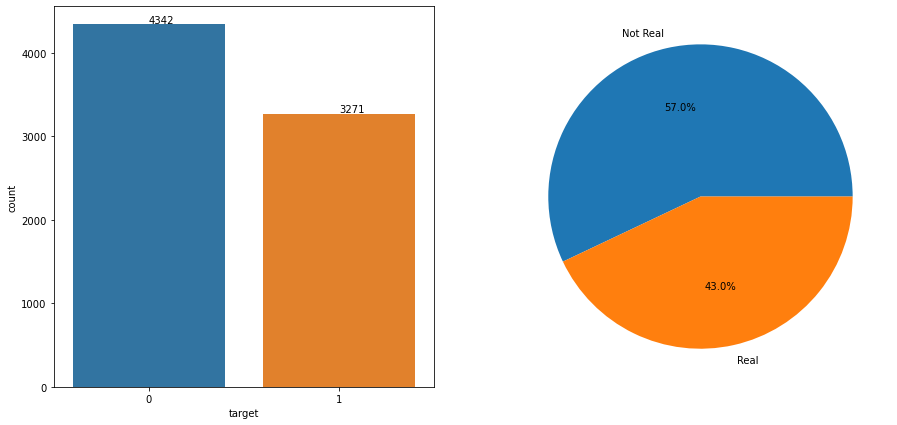

In [7]:
def barh(ax):
    
    for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x()+ p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height() + 15 #y-position
        ax.annotate(round(val,2),(x,y))

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ax = sns.countplot(train['target'])
barh(ax)
labels = ['Not Real','Real']
plt.subplot(1,2,2)
plt.pie(train.groupby(['target']).count()['id'],labels=labels, autopct='%1.1f%%')

plt.show()

In [8]:
train[train["target"] == 1]["text"].values[:3]

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"],
      dtype=object)

In [9]:
train[train["target"] == 0]["text"].values[:3]

array(["What's up man?", 'I love fruits', 'Summer is lovely'],
      dtype=object)

In [10]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

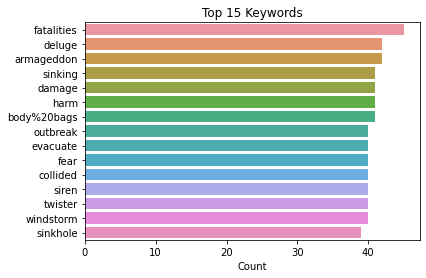

In [11]:
keywords_vc = pd.DataFrame({"Count": train["keyword"].value_counts()})
sns.barplot(y=keywords_vc[0:15].index, x=keywords_vc[0:15]["Count"], orient='h')
plt.title("Top 15 Keywords")
plt.show()

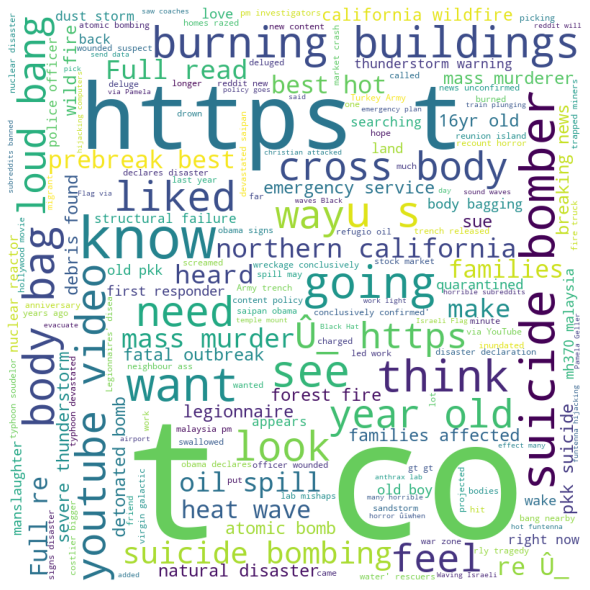

In [12]:
stopwordSet = set(STOPWORDS)
tweet_words = ''
for tweet in train['text']:
    tweet = str(tweet)
    tokens = tweet.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tweet_words += ' '.join(tokens) + ' '
        
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwordSet,
                min_font_size = 10).generate(tweet_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Data Cleaning & Preprocessing (regular expression)

In [13]:
train.drop(['id','location','keyword'],axis=1,inplace=True)

In [14]:
def preprocess_text(text):
    
    text=re.sub('<[^>]*>','',text)
    text=re.sub("[^A-Za-z" "]+"," ",text).lower()
    text=re.sub("[0-9" "]+"," ",text)
    emojis=re.findall('(?::|;|=)(?:-)?(?:)|(|D|P)',text)
    text=re.sub('[\W]+',' ',text.lower()) + ' '.join(emojis).replace('-','')

    text_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))

    # removing stop words
    filtered_text = []
    for w in text_tokens:
        if w not in stop_words:
            filtered_text.append(w)

    # returning it back to sentence
    return " ".join(filtered_text)

In [15]:
train['text'] = train.text.apply(preprocess_text)

In [16]:
train.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders cal...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [17]:
#決定X_train y_train X_test
X_train = train.text
y_train = train.target

X_test = test.text

# 邏輯回歸&SVM Model

# BERT and Embedding Model